## Linear Regression

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Data definition
First, let us define some data, expressing the number of daily cigarets smoked and the age of death for 30 persons:

In [34]:
daily_cig_smoked = np.array([36, 14, 18, 35, 14, 33,  2,  6, 14, 29, 21, 30,  0, 27, 16, 16, 29,
        2, 23, 16, 18, 14,  4, 32, 30, 25, 14, 20, 25, 21])

age_of_death = np.array([69.6, 92.4, 75.7, 68. , 77.1, 69.6, 94.1, 91.3, 87.1, 78.4, 75.3,
       66.5, 88.1, 77.2, 76.9, 86.7, 70.5, 94.2, 74.5, 71.1, 78.7, 78.6,
       89.4, 65.5, 69.2, 78. , 80.3, 77.4, 78.1, 74.9])

Just to have a nicer visualization of the data in table format, we will import the pandas library here. (There is no need to understand the content of the following cell; it is just for displaying our data in a nice table form):

In [35]:

import pandas
pandas.DataFrame(np.vstack((daily_cig_smoked, age_of_death)).T, columns=("daily cigarets","age of death"))


daily cigarets  age of death
0             36.0          69.6
1             14.0          92.4
2             18.0          75.7
3             35.0          68.0
4             14.0          77.1
5             33.0          69.6
6              2.0          94.1
7              6.0          91.3
8             14.0          87.1
9             29.0          78.4
10            21.0          75.3
11            30.0          66.5
12             0.0          88.1
13            27.0          77.2
14            16.0          76.9
15            16.0          86.7
16            29.0          70.5
17             2.0          94.2
18            23.0          74.5
19            16.0          71.1
20            18.0          78.7
21            14.0          78.6
22             4.0          89.4
23            32.0          65.5
24            30.0          69.2
25            25.0          78.0
26            14.0          80.3
27            20.0          77.4
28            25.0          78.1
29            21.0          74.9

Now, let us plot our data points:

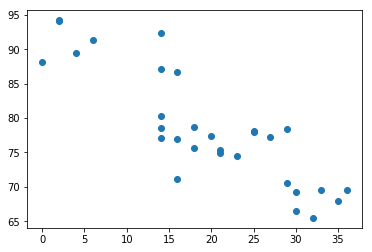

In [36]:
plt.plot(daily_cig_smoked, age_of_death, "o")

### Defining a linear model
Let us define our model: a linear model with parameters thetas_0 and thetas_1:$$age = \theta_0 + \theta_1\times cig$$

In [37]:
def model(x, thetas):
    thetas_0, thetas_1 = thetas
    return thetas_0 + thetas_1 * x

let us also define the loss (ie. the Mean Squared Distance): $$ loss(\vec{\theta}) = \frac{1}{N}\cdot\sum_i (model(\vec{\theta}, x_i)-y_i)^2$$

In [40]:
def compute_loss(thetas, input_values, output_values):
    loss = np.mean( (output_values - model(input_values, thetas))**2 )
    return loss

Let us try to compute the loss and visualize this model for some random thetas:

The current loss is: 2985.1094622243786


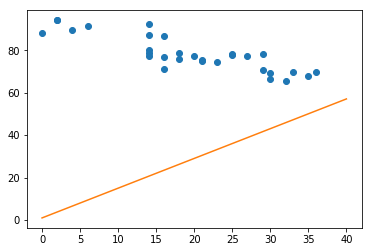

In [48]:
thetas = np.random.randn(2)

print("The current loss is:", compute_loss(thetas, daily_cig_smoked, age_of_death))

x_values = np.linspace(0,40)
plt.plot(daily_cig_smoked, age_of_death, "o")
plt.plot(x_values, model(x_values, thetas))

### Computing the gradient

We can now define the gradient:$$\frac{2}{N}\cdot\sum_i (\theta_0+ \theta_1 \times x_i-y_i)$$ $$\frac{2}{N}\cdot\sum_i x_i\times(\theta_0+ \theta_1 \times x_i-y_i)$$

In practice, we write $$diff_i=\theta_0+ \theta_1 \times x_i-y_i$$
and can then express the gradient as:
$$\frac{2}{N}\cdot\sum_i diff_i$$ $$\frac{2}{N}\cdot\sum_i x_i\times diff_i$$

In [49]:
def gradient_loss(thetas, input_values, output_values):
    diff = (output_values - model(input_values, thetas))
    grad_theta_0 = np.mean( -2*diff )
    grad_theta_1 = np.mean( -2*input_values*diff)
    return np.array([grad_theta_0, grad_theta_1])

### Gradient Descent

We start by initializing our two parameters thetas[0] and thetas[1]

In [80]:

thetas = np.random.randn(2)

We can now observe the first few iterations of gradient descent by repeatedly pressing Ctrl+Enter in the following cell:

loss: 1.0907468314404756e+37


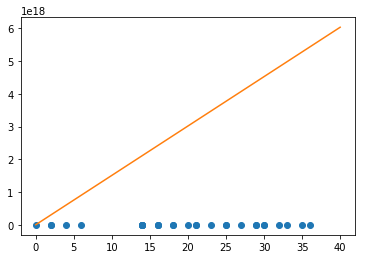

In [86]:
axes = plt.gca()
#axes.set_ylim([50,100])

plt.plot(daily_cig_smoked, age_of_death, "o")
plt.plot(x_values, model(x_values, thetas))
print("loss:", compute_loss(thetas, daily_cig_smoked, age_of_death))
thetas = thetas -2*gradient_loss(thetas, daily_cig_smoked, age_of_death)


In this specific case, the gradient descent is quite slow, so let us execute a lot of iterations (10000) at once:

loss: 17.67420501685153


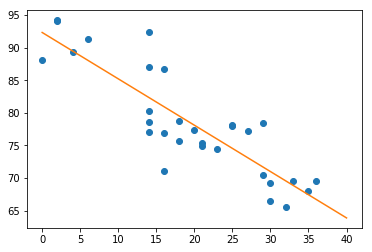

In [79]:

for num_iter in range(10000):
    thetas = thetas -0.002*gradient_loss(thetas, daily_cig_smoked, age_of_death)
    
plt.plot(daily_cig_smoked, age_of_death, "o")
plt.plot(x_values, model(x_values, thetas))
print("loss:", compute_loss(thetas, daily_cig_smoked, age_of_death))



In [77]:
print("Final values of thetas:", thetas[0], thetas[1])
print("If I smoke 10 cigarets a day, the model predict that I will die at", model(10, thetas))

Final values of thetas: 92.30212082635796 -0.7102724586230218
If I smoke 10 cigarets a day, the model predict that I will die at 85.19939624012774


### Using a library for Linear Regression

We could actually have obtained a similar result by using a linear regression function from a library. Eg. scipy

In [15]:
from scipy import stats
stats.linregress(daily_cig_smoked, age_of_death)

LinregressResult(slope=-0.7111554051044496, intercept=92.32382521936663, rvalue=-0.860588543557897, pvalue=1.0715989519551226e-09, stderr=0.0795361093072574)